# Classification Modeling

In [1]:
import classifiers as clf

import pickle

import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler

from imblearn.over_sampling  import SMOTENC

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Load Species Data

In [2]:
species = pd.read_pickle("../Data/species.pkl")
print(species.shape)
species.head()

(11347, 48)


,Scientific Name,Common Name,Federal Listing Status,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
0,Accipiter gentilis,Northern goshawk,Not Listed,32413,22877,324,251,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Acipenser fulvescens,Lake sturgeon,Not Listed,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Threatened,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agarodes alabamensis,[Unnamed] caddisfly,Not Listed,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agrimonia incisa,Incised groovebur,Not Listed,32413,22877,324,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Set Target and Feature Variables

In [3]:
# Create target variables
y = species['Federal Listing Status']
y_labels = list(y.unique())
print(y_labels)

# Create target variables
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name'], axis = 1)
X.head()

['Not Listed', 'Threatened', 'Endangered']


,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
0,32413,22877,324,251,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32413,22877,324,251,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,32413,22877,324,251,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,32413,22877,324,251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32413,22877,324,251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create Training and Test Sets

In [4]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# data set statistics
data_sets = pd.DataFrame({'Train':        y_train.value_counts(),
                          'Test':         y_test.value_counts(),
                          'Train Normal': y_train.value_counts() / y_train.count(),
                          'Test Normal':  y_test.value_counts()  / y_test.count()})

data_sets.loc['Total'] = data_sets.sum().astype(int)
data_sets

,Train,Test,Train Normal,Test Normal
Not Listed,6938,1737,0.764349,0.765198
Endangered,1506,378,0.165914,0.166520
Threatened,633,155,0.069737,0.068282
Total,9077,2270,1.000000,1.000000


### Feature Scaling

In [5]:
X_train.head()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
5697,35532,4848,363,277,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6796,30031,19542,359,273,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9576,167188,62425,363,284,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3518,34447,17461,365,324,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3766,36809,24768,315,247,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
non_categorical_cols = ['Total Land Area (Thousands of Acres)',
                        'Forest Land Area (Thousands of Acres)',
                        'Days with AQI',
                        'Good Days']
categorical_cols     = ['Group_Amphibians', 'Group_Birds', 'Group_Clams', 'Group_Crustaceans',
                        'Group_Ferns and Allies', 'Group_Fishes', 'Group_Flowering Plants',
                        'Group_Insects', 'Group_Mammals', 'Group_Reptiles', 'Group_Snails',
                        'VIP_I', 'VIP_P', 'VIP_V', 'State_AL', 'State_AR', 'State_AZ',
                        'State_CA', 'State_CO', 'State_FL', 'State_GA', 'State_HI', 'State_ID',
                        'State_IL', 'State_IN', 'State_KY', 'State_MO', 'State_MS', 'State_NC',
                        'State_NM', 'State_NY', 'State_OR', 'State_PA', 'State_SC', 'State_TN',
                        'State_TX', 'State_UT', 'State_VA', 'State_WA', 'State_WV', 'State_WY']

In [7]:
scaler                        = MinMaxScaler()
X_train[non_categorical_cols] = scaler.fit_transform(X_train[non_categorical_cols])
X_test[non_categorical_cols]  = scaler.transform(X_test[non_categorical_cols])

X_train.head()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
5697,0.095546,0.035154,0.989474,0.651786,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6796,0.080473,0.149738,0.968421,0.633929,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9576,0.456293,0.484143,0.989474,0.683036,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3518,0.092573,0.133511,1.000000,0.861607,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3766,0.099045,0.190491,0.736842,0.517857,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Classification Model Hyper Parameter Grid Search

In [8]:
# define parameter grid search for all classifiers
classifiers = []

# dummy classifier
classifiers.append(
    clf.grid_search_dummy_classifier(dict(
        strategy=['most_frequent','stratified'])))

# logistic regression
classifiers.append(
    clf.grid_search_logistic_regression(dict(
        C=[1e-2,1e0,1e2,1e6,1e12],
        penalty=['l1', 'l2'],
        fit_intercept=[True, False],
        multi_class=['ovr'],
        solver=['liblinear'])))

# multinomial naive bayes classifer
classifiers.append(
    clf.grid_search_multinomial_nb(dict(
        alpha=[0.0,1.0],
        fit_prior=[True])))

# k nearest neighbors classifier
classifiers.append(
    clf.grid_search_k_neighbors_classifier(dict(
#        n_neighbors=[5,11],
#        weights=['uniform', 'distance'],
        algorithm=['ball_tree','kd_tree'],
        leaf_size=[100,200])))

# decision tree classifier
classifiers.append(
    clf.grid_search_decision_tree_classifier(dict(
        criterion=['gini','entropy'],
#        max_depth=[6,8],
#        min_samples_leaf=[20,50,100],
#        max_features=[20,30,40],
        min_impurity_decrease=[0.01,0.03,0.05])))

# random forest classifier
classifiers.append(
    clf.grid_search_random_forest_classifier(dict(
        n_estimators=[100,200,300],
#        max_depth=[2,3,4],
#        min_samples_leaf=[100,200],
#        max_features=[10,20],
        min_impurity_decrease=[0.01,0.03,0.05])))

# ada boost classifer
classifiers.append(
    clf.grid_search_ada_boost_classifier(dict(
        n_estimators=[100,200,300],
        learning_rate=[0.5,1.0])))

### Classification Training Model 1:  Fish & Wildlife Service

In [9]:
X_train_fws = X_train[categorical_cols]
X_test_fws  = X_test[categorical_cols]

# run FWS dataset
model_fws = clf.fit_predict_measure(
    'FWS', X_train_fws, X_test_fws, y_train, y_test, y_labels, classifiers)
model_fws

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0872s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   23.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.6s finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0784s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    9.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.5s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   34.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.1s finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,FWS,Dummy,{'strategy': 'most_frequent'},Train,0.764349,0.584230,0.764349,0.662261,NaN
1,FWS,Dummy,{'strategy': 'stratified'},Train,0.613749,0.616156,0.620579,0.616473,NaN
2,FWS,Dummy,{'strategy': 'most_frequent'},Test,0.765198,0.585528,0.765198,0.663414,"[[1737, 0, 0], [155, 0, 0], [378, 0, 0]]"
3,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.764349,0.584230,0.764349,0.662261,NaN
4,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.764349,0.584230,0.764349,0.662261,NaN
5,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.764349,0.584230,0.764349,0.662261,NaN
6,FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.773273,0.716080,0.773273,0.688290,NaN
7,FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.787044,0.725240,0.787044,0.722972,NaN
8,FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.787044,0.725240,0.787044,0.722972,NaN
9,FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.787044,0.725240,0.787044,0.722972,NaN


In [10]:
# statistics of FWS classifiers (test and training sets)
model_fws.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.771907,0.682108,0.772029,0.700848
std,0.026582,0.070284,0.025849,0.030720
min,0.613749,0.584230,0.620579,0.616473
25%,0.764349,0.584230,0.764349,0.662261
50%,0.781407,0.720867,0.781407,0.720293
75%,0.787265,0.732602,0.787265,0.723354
max,0.794714,0.762885,0.794714,0.740855


In [11]:
# best estimators of FWS dataset
model_fws_test = model_fws[model_fws['Split'] == 'Test']
model_fws_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
26,FWS,Multinomial Naive Bayes,"{'alpha': 1.0, 'fit_prior': True}",Test,0.778414,0.760026,0.778414,0.740855,"[[1656, 62, 19], [122, 24, 9], [270, 21, 87]]"
23,FWS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.794714,0.736215,0.794714,0.734271,"[[1717, 1, 19], [146, 0, 9], [290, 1, 87]]"
55,FWS,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 100}",Test,0.794714,0.736215,0.794714,0.734271,"[[1717, 1, 19], [146, 0, 9], [290, 1, 87]]"
38,FWS,Decision Tree,"{'criterion': 'gini', 'min_impurity_decrease':...",Test,0.790308,0.730097,0.790308,0.725662,"[[1719, 0, 18], [147, 0, 8], [303, 0, 75]]"
31,FWS,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.725991,0.713093,0.725991,0.712318,"[[1446, 6, 285], [127, 3, 25], [174, 5, 199]]"
2,FWS,Dummy,{'strategy': 'most_frequent'},Test,0.765198,0.585528,0.765198,0.663414,"[[1737, 0, 0], [155, 0, 0], [378, 0, 0]]"
48,FWS,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.765198,0.585528,0.765198,0.663414,"[[1737, 0, 0], [155, 0, 0], [378, 0, 0]]"


### Handling Class Imbalance with SMOTENC Oversampling

In [12]:
# balance classes with SMOTENC oversampling
smote = SMOTENC(categorical_features=list(range(4,len(X_train.columns))))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

# balanced data set statistics
smote_sets = pd.DataFrame({'Train':        y_train_smote.value_counts(),
                           'Test':         y_test.value_counts(),
                           'Train Normal': y_train_smote.value_counts() / y_train_smote.count(),
                           'Test Normal':  y_test.value_counts()        / y_test.count()})

smote_sets.loc['Total'] = smote_sets.sum().astype(int)
smote_sets

,Train,Test,Train Normal,Test Normal
Endangered,6938,378,0.333333,0.166520
Not Listed,6938,1737,0.333333,0.765198
Threatened,6938,155,0.333333,0.068282
Total,20814,2270,1.000000,1.000000


In [13]:
# check categorical features of class-balanced model
X_train_smote.describe()

,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
count,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,...,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000,20814.000000
mean,0.133817,0.148452,0.924964,0.634465,0.011290,0.078649,0.090852,0.010041,0.009225,0.074853,...,0.032622,0.006246,0.011723,0.034688,0.040742,0.026521,0.027097,0.018401,0.008120,0.006918
std,0.130731,0.129089,0.184102,0.234841,0.105658,0.269197,0.287406,0.099704,0.095603,0.263161,...,0.177650,0.078785,0.107638,0.182993,0.197696,0.160681,0.162370,0.134400,0.089744,0.082891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067439,0.084445,0.952632,0.517857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.092573,0.135527,0.984211,0.638393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.179938,0.190491,1.000000,0.783071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


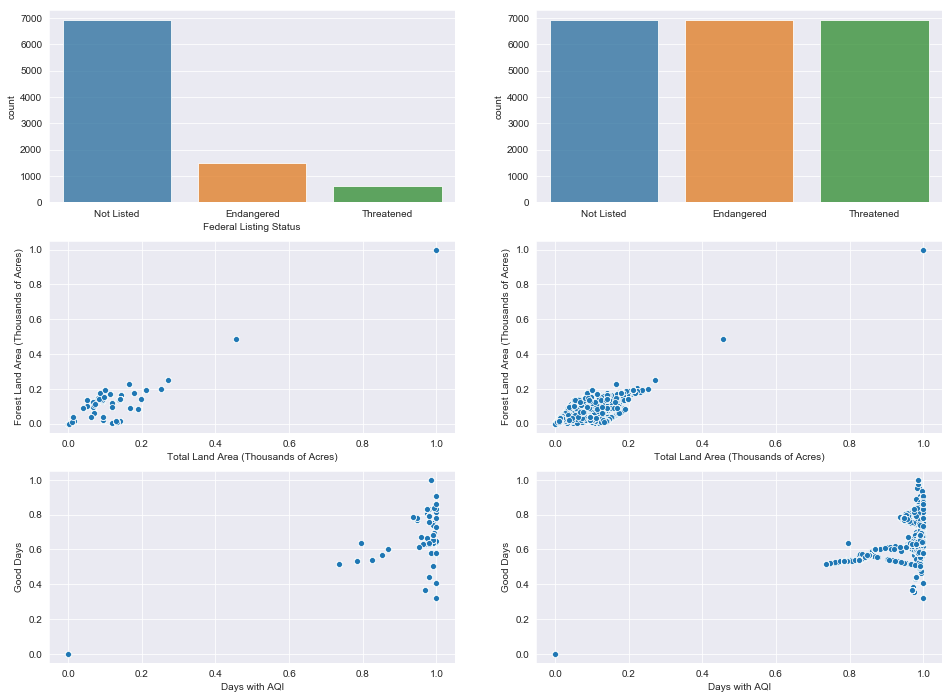

In [14]:
# plot comparison of unbalanced and balanced training sets
fig, axes = plt.subplots(3, 2, figsize=(16,12))

sns.countplot(y_train,       order=y_train.value_counts().index, alpha=0.8, ax = axes[0,0])
sns.countplot(y_train_smote, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,1])

sns.scatterplot(x=X_train.columns[0],       y=X_train.columns[1],       data=X_train,       ax = axes[1,0])
sns.scatterplot(x=X_train_smote.columns[0], y=X_train_smote.columns[1], data=X_train_smote, ax = axes[1,1])

sns.scatterplot(x=X_train.columns[2],       y=X_train.columns[3],       data=X_train,       ax = axes[2,0])
sns.scatterplot(x=X_train_smote.columns[2], y=X_train_smote.columns[3], data=X_train_smote, ax = axes[2,1])

### Classification Training Model 2: Balanced FWS

In [15]:
X_train_smote_fws = X_train_smote[categorical_cols]
X_test_fws        = X_test[categorical_cols]

# run balanced FWS dataset
model_smote_fws = clf.fit_predict_measure(
    'SMOTE_FWS', X_train_smote_fws, X_test_fws, y_train_smote, y_test, y_labels, classifiers)
model_smote_fws

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  1.8min remaining:   26.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.2min finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1805s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   18.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.8s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,SMOTE_FWS,Dummy,{'strategy': 'most_frequent'},Train,0.333333,0.111111,0.333333,0.166667,NaN
1,SMOTE_FWS,Dummy,{'strategy': 'stratified'},Train,0.332228,0.334066,0.332228,0.328899,NaN
2,SMOTE_FWS,Dummy,{'strategy': 'stratified'},Test,0.344934,0.627962,0.344934,0.414476,"[[607, 563, 567], [58, 45, 52], [116, 131, 131]]"
3,SMOTE_FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.547084,0.570674,0.547084,0.544080,NaN
4,SMOTE_FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.551648,0.573635,0.551648,0.549465,NaN
5,SMOTE_FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.546315,0.569022,0.546315,0.543277,NaN
6,SMOTE_FWS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.549966,0.571083,0.549966,0.547600,NaN
7,SMOTE_FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.572307,0.578990,0.572307,0.571836,NaN
8,SMOTE_FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.572259,0.578944,0.572259,0.571829,NaN
9,SMOTE_FWS,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.570722,0.577591,0.570722,0.570245,NaN


In [16]:
# statistics of balanced FWS classifiers (test and training sets)
model_smote_fws.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.522233,0.531488,0.522233,0.500202
std,0.093470,0.163893,0.093470,0.142998
min,0.332228,0.111111,0.332228,0.166667
25%,0.459607,0.567136,0.459607,0.411257
50%,0.552032,0.577531,0.552032,0.558425
75%,0.571274,0.579107,0.571274,0.571831
max,0.730396,0.773291,0.730396,0.714027


In [17]:
# best estimators of balanced FWS dataset
model_smote_fws_test = model_smote_fws[model_smote_fws['Split'] == 'Test']
model_smote_fws_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
31,SMOTE_FWS,K Nearest Neighbors,"{'algorithm': 'ball_tree', 'leaf_size': 200}",Test,0.730396,0.704923,0.730396,0.714027,"[[1470, 14, 253], [132, 3, 20], [187, 6, 185]]"
38,SMOTE_FWS,Decision Tree,"{'criterion': 'entropy', 'min_impurity_decreas...",Test,0.672687,0.773291,0.672687,0.711030,"[[1267, 323, 147], [65, 80, 10], [108, 90, 180]]"
48,SMOTE_FWS,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.642291,0.755409,0.642291,0.683682,"[[1194, 323, 220], [65, 80, 10], [104, 90, 184]]"
26,SMOTE_FWS,Multinomial Naive Bayes,"{'alpha': 1.0, 'fit_prior': True}",Test,0.627313,0.748016,0.627313,0.670724,"[[1163, 313, 261], [63, 73, 19], [101, 89, 188]]"
23,SMOTE_FWS,Logistic Regression,"{'C': 100.0, 'fit_intercept': True, 'multi_cla...",Test,0.561674,0.732050,0.561674,0.616397,"[[1002, 438, 297], [61, 75, 19], [100, 80, 198]]"
55,SMOTE_FWS,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 200}",Test,0.537885,0.737800,0.537885,0.597876,"[[938, 500, 299], [52, 81, 22], [89, 87, 202]]"
2,SMOTE_FWS,Dummy,{'strategy': 'stratified'},Test,0.344934,0.627962,0.344934,0.414476,"[[607, 563, 567], [58, 45, 52], [116, 131, 131]]"


### Classification Training Model 3:  Balanced FWS + Forest Service

In [18]:
X_train_smote_fws_fs = X_train_smote.drop(['Days with AQI', 'Good Days'], axis=1)
X_test_fws_fs        = X_test.drop(['Days with AQI', 'Good Days'], axis=1)

# run balanced FWS + FS dataset
model_smote_fws_fs = clf.fit_predict_measure(
    'SMOTE_FWS_FS', X_train_smote_fws_fs, X_test_fws_fs, y_train_smote, y_test, y_labels, classifiers)
model_smote_fws_fs

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  2.4min remaining:   36.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.7min finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   17.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   18.7s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.3min remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,SMOTE_FWS_FS,Dummy,{'strategy': 'most_frequent'},Train,0.333333,0.111111,0.333333,0.166667,NaN
1,SMOTE_FWS_FS,Dummy,{'strategy': 'stratified'},Train,0.336552,0.331588,0.336312,0.336754,NaN
2,SMOTE_FWS_FS,Dummy,{'strategy': 'stratified'},Test,0.325551,0.617887,0.325551,0.395385,"[[577, 575, 585], [51, 51, 53], [122, 145, 111]]"
3,SMOTE_FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.547084,0.570674,0.547084,0.544080,NaN
4,SMOTE_FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.550495,0.572209,0.550495,0.548311,NaN
5,SMOTE_FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.546315,0.569022,0.546315,0.543277,NaN
6,SMOTE_FWS_FS,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.548573,0.570187,0.548573,0.545961,NaN
7,SMOTE_FWS_FS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.574277,0.581002,0.574277,0.573704,NaN
8,SMOTE_FWS_FS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.573748,0.580394,0.573748,0.573182,NaN
9,SMOTE_FWS_FS,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.572643,0.579650,0.572643,0.572115,NaN


In [19]:
# statistics of balanced FWS + FS classifiers (test and training sets)
model_smote_fws_fs.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.532645,0.536815,0.532640,0.516413
std,0.090481,0.165707,0.090490,0.139076
min,0.325551,0.111111,0.325551,0.166667
25%,0.544105,0.560724,0.544105,0.541051
50%,0.570577,0.578641,0.570577,0.570964
75%,0.573040,0.580546,0.573040,0.572780
max,0.672687,0.773291,0.672687,0.711030


In [20]:
# best estimators of balanced FWS + FS dataset
model_smote_fws_fs_test = model_smote_fws_fs[model_smote_fws_fs['Split'] == 'Test']
model_smote_fws_fs_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
38,SMOTE_FWS_FS,Decision Tree,"{'criterion': 'entropy', 'min_impurity_decreas...",Test,0.672687,0.773291,0.672687,0.711030,"[[1267, 323, 147], [65, 80, 10], [108, 90, 180]]"
48,SMOTE_FWS_FS,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.632159,0.751406,0.632159,0.674733,"[[1168, 316, 253], [62, 78, 15], [101, 88, 189]]"
31,SMOTE_FWS_FS,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200}",Test,0.647137,0.712581,0.647137,0.668348,"[[1217, 119, 401], [96, 19, 40], [127, 18, 233]]"
26,SMOTE_FWS_FS,Multinomial Naive Bayes,"{'alpha': 0.0, 'fit_prior': True}",Test,0.607048,0.743012,0.607048,0.654395,"[[1117, 338, 282], [61, 73, 21], [99, 91, 188]]"
55,SMOTE_FWS_FS,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Test,0.577974,0.741410,0.577974,0.631160,"[[1036, 405, 296], [58, 74, 23], [93, 83, 202]]"
23,SMOTE_FWS_FS,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Test,0.568722,0.740360,0.568722,0.623458,"[[1012, 426, 299], [57, 75, 23], [92, 82, 204]]"
2,SMOTE_FWS_FS,Dummy,{'strategy': 'stratified'},Test,0.325551,0.617887,0.325551,0.395385,"[[577, 575, 585], [51, 51, 53], [122, 145, 111]]"


### Classification Training Model 4:  Balanced FWS + FS + Environmental Protection Agency

In [21]:
X_train_smote_fws_fs_epa = X_train_smote
X_test_fws_fs_epa        = X_test

# run balanced FWS + FS + EPA dataset
model_smote_fws_fs_epa = clf.fit_predict_measure(
    'SMOTE_FWS_FS_EPA', X_train_smote_fws_fs_epa, X_test_fws_fs_epa, y_train_smote, y_test, y_labels, classifiers)
model_smote_fws_fs_epa

Running jobs: Dummy
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running jobs: Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


Running jobs: Multinomial Naive Bayes
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


Running jobs: K Nearest Neighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  2.5min remaining:   37.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.7min finished


Running jobs: Decision Tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.4s finished


Running jobs: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:   18.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.1s finished


Running jobs: Ada Boost
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,SMOTE_FWS_FS_EPA,Dummy,{'strategy': 'most_frequent'},Train,0.333333,0.111111,0.333333,0.166667,NaN
1,SMOTE_FWS_FS_EPA,Dummy,{'strategy': 'stratified'},Train,0.335495,0.332111,0.334871,0.334342,NaN
2,SMOTE_FWS_FS_EPA,Dummy,{'strategy': 'stratified'},Test,0.324229,0.598313,0.324229,0.388860,"[[566, 582, 589], [58, 54, 43], [139, 123, 116]]"
3,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.547084,0.570841,0.547084,0.544101,NaN
4,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': True, 'multi_clas...",Train,0.549870,0.570595,0.549870,0.547864,NaN
5,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.547084,0.570841,0.547084,0.544101,NaN
6,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 0.01, 'fit_intercept': False, 'multi_cla...",Train,0.548141,0.567908,0.548141,0.545970,NaN
7,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.573604,0.580360,0.573604,0.573113,NaN
8,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Train,0.574229,0.580756,0.574229,0.573674,NaN
9,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 1.0, 'fit_intercept': False, 'multi_clas...",Train,0.573364,0.580144,0.573364,0.572880,NaN


In [22]:
# statistics of balanced FWS + FS + EPA classifiers (test and training sets)
model_smote_fws_fs_epa.describe()

,Accuracy,Precision,Recall,F1 Score
count,56.000000,56.000000,56.000000,56.000000
mean,0.532734,0.534085,0.532723,0.515020
std,0.092358,0.167571,0.092382,0.142785
min,0.324229,0.111111,0.324229,0.166667
25%,0.544850,0.562522,0.544850,0.541829
50%,0.572619,0.579242,0.572619,0.572238
75%,0.573905,0.582363,0.573905,0.573270
max,0.672687,0.773291,0.672687,0.711030


In [23]:
# best estimators of balanced FWS + FS + EPA dataset
model_smote_fws_fs_epa_test = model_smote_fws_fs_epa[model_smote_fws_fs_epa['Split'] == 'Test']
model_smote_fws_fs_epa_test.sort_values(by=['F1 Score'], ascending=False)

,Data,Classifier,Parameters,Split,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
38,SMOTE_FWS_FS_EPA,Decision Tree,"{'criterion': 'entropy', 'min_impurity_decreas...",Test,0.672687,0.773291,0.672687,0.711030,"[[1267, 323, 147], [65, 80, 10], [108, 90, 180]]"
48,SMOTE_FWS_FS_EPA,Random Forest,"{'min_impurity_decrease': 0.01, 'n_estimators'...",Test,0.632599,0.750781,0.632599,0.674933,"[[1170, 316, 251], [63, 78, 14], [102, 88, 188]]"
31,SMOTE_FWS_FS_EPA,K Nearest Neighbors,"{'algorithm': 'kd_tree', 'leaf_size': 200}",Test,0.644053,0.712286,0.644053,0.666038,"[[1209, 120, 408], [96, 19, 40], [125, 19, 234]]"
26,SMOTE_FWS_FS_EPA,Multinomial Naive Bayes,"{'alpha': 1.0, 'fit_prior': True}",Test,0.622026,0.745481,0.622026,0.665956,"[[1151, 313, 273], [63, 73, 19], [101, 89, 188]]"
23,SMOTE_FWS_FS_EPA,Logistic Regression,"{'C': 1.0, 'fit_intercept': True, 'multi_class...",Test,0.581498,0.743213,0.581498,0.633893,"[[1041, 397, 299], [57, 75, 23], [92, 82, 204]]"
55,SMOTE_FWS_FS_EPA,Ada Boost,"{'learning_rate': 1.0, 'n_estimators': 300}",Test,0.575771,0.738057,0.575771,0.628647,"[[1032, 406, 299], [61, 73, 21], [95, 81, 202]]"
2,SMOTE_FWS_FS_EPA,Dummy,{'strategy': 'stratified'},Test,0.324229,0.598313,0.324229,0.388860,"[[566, 582, 589], [58, 54, 43], [139, 123, 116]]"


### Data Loading

In [24]:
model_fws.to_pickle(             '../Data/model_fws.pkl')
model_smote_fws.to_pickle(       '../Data/model_smote_fws.pkl')
model_smote_fws_fs.to_pickle(    '../Data/model_smote_fws_fs.pkl')
model_smote_fws_fs_epa.to_pickle('../Data/model_smote_fws_fs_epa.pkl')
pd.DataFrame(y_labels).to_pickle('../Data/y_labels.pkl')